<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/Important_Reminder_of_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests , io


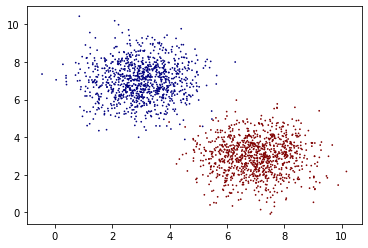

In [102]:

n_class_1 = 1000
n_class_2 = 1000

class_1_x = np.random.randn(n_class_1)*1 + 3
class_1_y = np.random.randn(n_class_1)*1 + 7
label_class_1 = [0] * n_class_1

class_2_x = np.random.randn(n_class_1)*1 + 7 
class_2_y = np.random.randn(n_class_1)*1 + 3
label_class_2 = [1] * n_class_2

y = class_1_y.tolist() + class_2_y.tolist()
x = class_1_x.tolist() + class_2_x.tolist()
label = label_class_1 + label_class_2

data = np.vstack((x,y,label)).T


plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s= 0.5)

In [0]:
np.random.shuffle( data)

In [0]:
X = data[:,[0,1]]
Y = data[:,2]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [107]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[238,   1],
       [  1, 260]])

In [109]:
w = model.coef_   # it will give us the slope (or the weight) of each feature
b = model.intercept_  # it is the intercept of the fitting 
'''
our model is w[0]*Flour + w[1]*Sugar + intercept = hypothesi
in depend on the function SVC uses (i.e. sigmoid or arctan , ...) 
the out put will be sigmoid(hypothesis).
NOTE that the hypothesis is the decision boundary
'''
w = w[0] # note that w is a matrix with dimansion (1 , n_features)
print(b.shape)

(1,)


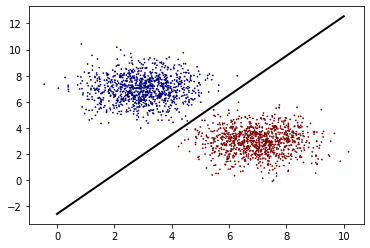

In [110]:
x = np.linspace(0,10)
y = -w[0]/w[1] * x - b/w[1]
plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s = 0.5)
plt.plot(x,y,linewidth=2,color='black')


## Multivarient

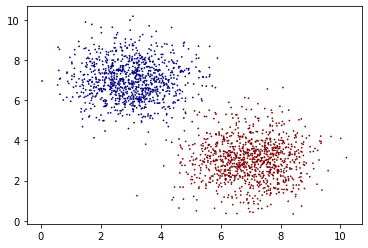

In [111]:

n_class_1 = 1000
n_class_2 = 1000

class_1_x = np.random.randn(n_class_1)*1 + 3
class_1_y = np.random.randn(n_class_1)*1 + 7
label_class_1 = [0] * n_class_1

class_2_x = np.random.randn(n_class_1)*1 + 7 
class_2_y = np.random.randn(n_class_1)*1 + 3
label_class_2 = [1] * n_class_2

y = class_1_y.tolist() + class_2_y.tolist()
x = class_1_x.tolist() + class_2_x.tolist()
label = label_class_1 + label_class_2

data = np.vstack((x,y,label)).T


plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s= 0.5)

In [0]:
np.random.shuffle( data)

In [0]:
X = data[:,[0,1]]
Y = data[:,2]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [116]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred  =tree_clf.predict(x_test)

In [118]:
confusion_matrix(y_test, y_pred)

array([[241,   2],
       [  2, 255]])

#PCA

In [0]:
from sklearn.decomposition import PCA

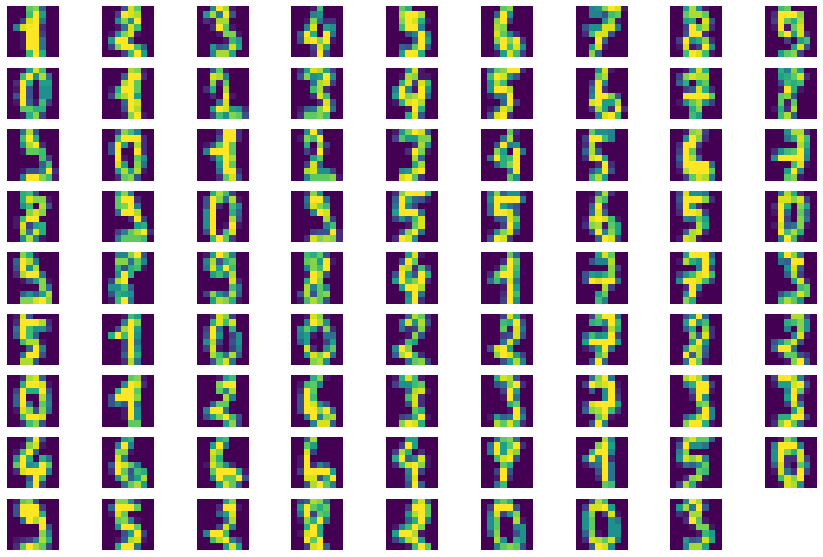

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
#axs = ['ax' + str(i) for i in range(1,401)]
axs = [i for i in range(1,81)]
fig = plt.figure(figsize=(15,10))
i=1
for ax in axs:
  ax = fig.add_subplot(9,9,i)
  ax.imshow(digits.data[i].reshape(8,8))
  ax.axis("off")
  i = i+1
  
plt.imshow(digits.data[3].reshape(8,8))

In [121]:
pca = PCA(5)
pca_digit = pca.fit_transform(digits.data)
print(digits.data.shape)
print(pca_digit.shape)

(1797, 64)
(1797, 5)


In [122]:
pca_digit.shape

(1797, 5)

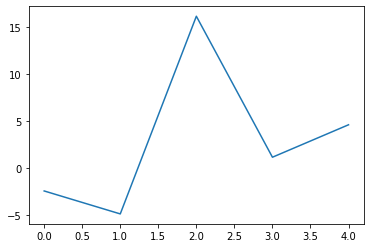

In [123]:
plt.plot(pca_digit[12,:])

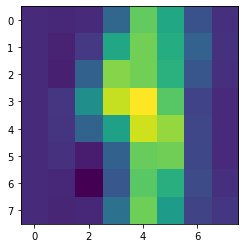

In [124]:
DIGIT = pca.inverse_transform(pca_digit)
plt.imshow(DIGIT[21].reshape((8,8)))

the scree plot of the features is :


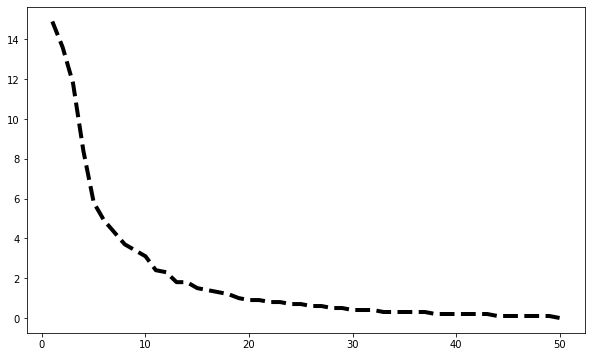

In [125]:
n=50
pca = PCA(n)
pca.fit(digits['data'])
data = pca.transform(digits['data'])
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
print('the scree plot of the features is :')
#ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
ax.plot(range(1,len(per_var)+1),per_var,'k--',linewidth=4,)

#PCA on the 3-channel image

as you can find here https://dsp.stackexchange.com/questions/58730/apply-principal-component-analysis-pca-for-rgb-images

you can vectorize the image into 3*m*n and then perform the PCA method

(21, 64)

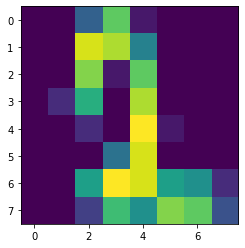

In [126]:
test = digits['data'][:21]
plt.imshow(test[12].reshape((8,8)))
test.shape

In [127]:
pca = PCA(14)
test_PCA = pca.fit_transform(test)
test_PCA.shape

(21, 14)

#PCA on the time series

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters
import random

In [151]:
subj = datafetch.fetch_subject(12)
subj.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [0]:
Data = []
class_list = ['none'] + [ 'train_data_class{}'.format(i+1) for i in range(4)]
Label = []

for i in range(15):
  subj = datafetch.fetch_subject(i+1)
  for class_ in range(1,5):
    Data.append(subj[class_list[class_]])
    Label += [class_]*25

Data = np.array(Data)
Label = np.array(Label)

In [0]:
n_trial = 25
n_subjects = 15
n_classes = 4

In [188]:
n_trial*n_subjects*n_classes

1500

In [190]:
Data = Data.reshape(n_trial*n_subjects*n_classes,-1)
Data.shape, Label.shape

((1500, 453600), (1500,))

the scree plot of the features is :


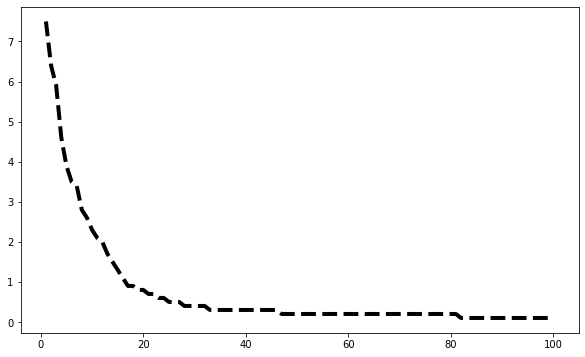

In [241]:
n=100
pca = PCA(n)
pca.fit(Data)
data = pca.transform(Data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
print('the scree plot of the features is :')
#ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
ax.plot(range(1,len(per_var)+1),per_var,'k--',linewidth=4,)

In [0]:
pca = PCA(100)
data = pca.fit_transform(Data)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [0]:
x_train, x_test, y_train, y_test  = train_test_split(data, Label)

In [225]:


tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = tree_clf.predict(x_test)
y_pred_train = tree_clf.predict(x_train)

In [227]:
confusion_matrix(y_test, y_pred)

array([[25, 28, 22, 25],
       [19, 30, 22, 25],
       [19, 29, 21, 28],
       [14, 18, 14, 36]])

In [228]:
confusion_matrix(y_train, y_pred_train)

array([[222,  13,   1,  39],
       [  9, 225,   2,  43],
       [  5,  32, 206,  35],
       [ 11,  24,   5, 253]])

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.33      0.34       101
           2       0.21      0.22      0.21        92
           3       0.26      0.30      0.28        82
           4       0.44      0.40      0.42       100

    accuracy                           0.31       375
   macro avg       0.32      0.31      0.31       375
weighted avg       0.32      0.31      0.32       375



#Visualization

In [0]:
pca_test = PCA(2)
data_test_2d = pca_test.fit_transform(Data)

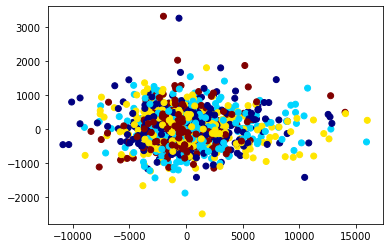

In [234]:
plt.scatter(data[:,0], data[:,60], cmap='jet', c=Label)

## RandomForest

In [242]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs=-1, max_depth=10)
rnd_clf.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rnd_clf.predict(x_test)
y_pred_train = rnd_clf.predict(x_train)

In [244]:
confusion_matrix(y_test, y_pred)

array([[18, 17, 26, 39],
       [14, 24, 19, 39],
       [18, 17, 23, 39],
       [ 9,  6,  6, 61]])

In [245]:
confusion_matrix(y_train, y_pred_train)

array([[195,   6,   7,  67],
       [  6, 183,   9,  81],
       [  9,  13, 191,  65],
       [ 13,  12,  12, 256]])